In [4]:
import cv2
from matplotlib import pyplot as plt
from edge_detection import*
import os

In [24]:
img = cv2.imread('4.jpg')
opening = create_Mathematical_Morphology_for_image(img)
mathematical_morphology_sobel_image = create_sobel_filter_for_image(image=opening, x_kernel= 3, y_kernel=3, threshold_value=100)

sobel_image = create_sobel_filter_for_image(image=img, x_kernel= 3, y_kernel=3, threshold_value=100)
type(img)

numpy.ndarray

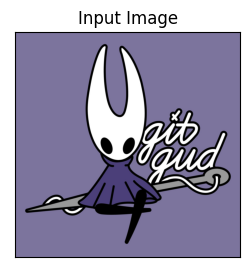

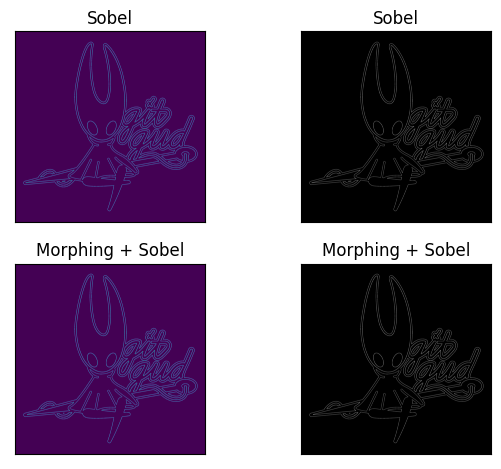

In [13]:
plt.subplot(121),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(224),plt.imshow(mathematical_morphology_sobel_image, cmap='gray')
plt.title('Morphing + Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sobel_image, cmap='gray')
plt.title("Sobel"), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(mathematical_morphology_sobel_image)
plt.title('Morphing + Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(221),plt.imshow(sobel_image)
plt.title("Sobel"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [65]:
test_path = r"BSDS500\data/images/test"
train_path = r"BSDS500\data\images\train"
validation_path = r"BSDS500\data\images\val"


In [6]:
def read_images(path):
    return os.listdir(path)

In [88]:
def read_images_from_path():
    cv_images = []
    for image in read_images(test_path):
        image = cv2.imread(f"{test_path}/{image}")
        cv_images.append(image)
    return cv_images

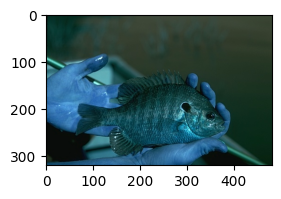

In [87]:
plt.subplot(224),plt.imshow(cv_images[69])
plt.show()